In [2]:
# 梯度下降工作原理举例说明
# % matplotlib inline
import numpy as np
import torch
import math
import sys
sys.path.append("..")
import d2lzh_pytorch as d2l

def gd(eta):
    x = 10
    result = [x]
    for i in range(10):
        x -= eta*2*x
        result.append(x)
        
    print('epoch 10,x:',x)
    return result
res = gd(0.2)

def show_trace(res):
    n = max(abs(min(res)), abs(max(res)), 10)
    f_line = np.arange(-n, n, 0.1)
    d2l.set_figsize()
    d2l.plt.plot(f_line, [x * x for x in f_line])
    d2l.plt.plot(res, [x * x for x in res], '-o')
    d2l.plt.xlabel('x')
    d2l.plt.ylabel('f(x)')

show_trace(res)

epoch 10,x: 0.06046617599999997


epoch 10,x: 5.386151140948998


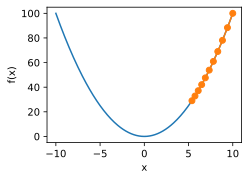

In [3]:
# 学习率
show_trace(gd(0.03))

epoch 10,x: 61.917364224000096


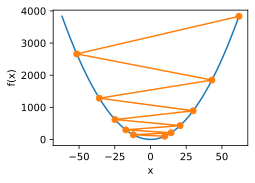

In [4]:
show_trace(gd(1.1))

epoch 20,x1 -0.057646,x2 -0.000073


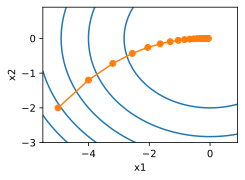

In [11]:
# 多维梯度下降
def train_2d(trainer):
    x1,x2,s1,s2 = -5,-2,0,0 # s1和s2是自变量状态，本章后几节会使用
    result = [(x1,x2)]
    for i in range(20):
        x1,x2,s1,s2 = trainer(x1,x2,s1,s2)
        result.append((x1,x2))
    print('epoch %d,x1 %f,x2 %f'%(i+1,x1,x2))
    return result
def show_trace_2d(f,result):
    d2l.plt.plot(*zip(*result),'-o',color='#ff7f0e')
    x1,x2= np.meshgrid(np.arange(-5.5,1.0,0.1),np.arange(-3.0,1.0,0.1))
    d2l.plt.contour(x1,x2,f(x1,x2),colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')
    
eta = 0.1
def f_2d(x1,x2):
    return x1**2 + 2*x2**2

def gd_2d(x1,x2,s1,s2):
    return (x1-eta*2*x1,x2-eta*4*x2,0,0)

show_trace_2d(f_2d,train_2d(gd_2d))







epoch 20,x1 -0.087947,x2 -0.080515


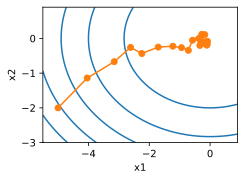

In [13]:
# 随机梯度下降
# 随机梯度下降减小了每次迭代的计算开销
# 随机梯度是对梯度的一个良好的估计
def sgd_2d(x1,x2,s1,s2):
    return (x1 - eta*(2*x1+np.random.normal(0.1)),
            x2 - eta*(4*x2+np.random.normal(0.1)),0,0)

show_trace_2d(f_2d,train_2d(sgd_2d))